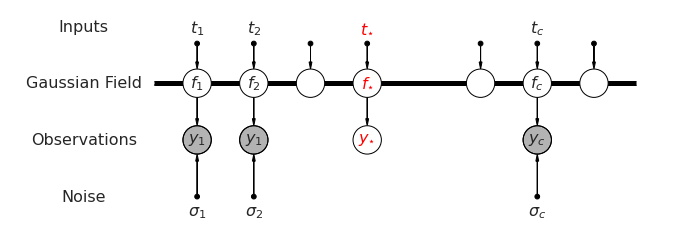

In [1]:
import daft
import seaborn as sns
from matplotlib import rcParams

from paths import figures

sns.set_context("notebook")
sns.set_style("ticks")

rcParams["font.size"] = 16

# Instantiate the PGM.
pgm = daft.PGM(node_fc="w")
#pgm = daft.PGM()
scale_y = 1.0

# Inputs.
offset = (0, 5.0)
pgm.add_node("t_1", r"$t_1$", 0, 1.7 * scale_y, fixed=True, offset=offset)
pgm.add_node("t_2", r"$t_2$", 1, 1.7 * scale_y, fixed=True, offset=offset)
pgm.add_node("t_empty_1", "", 2, 1.7 * scale_y, fixed=True, offset=offset)
pgm.add_node(
    "t_star",
    r"$t_{\star}$",
    3,
    1.7 * scale_y,
    fixed=True,
    offset=offset,
    label_params={"color": "r"},
)
pgm.add_node("t_empty_2", "", 5, 1.7 * scale_y, fixed=True, offset=offset)
pgm.add_node("t_c", r"$t_c$", 6, 1.7 * scale_y, fixed=True, offset=offset)
pgm.add_node("t_empty_3", "", 7, 1.7 * scale_y, fixed=True, offset=offset)

# Gaussian field
pgm.add_node("f_1", r"$f_1$", 0, 1 * scale_y, plot_params={'fc':'w'})
pgm.add_node("f_2", r"$f_2$", 1, 1 * scale_y)
pgm.add_node("f_empty_1", "", 2, 1 * scale_y)
pgm.add_node("f_star", r"$f_{\star}$", 3, 1 * scale_y, label_params={"color": "r"})
pgm.add_node("f_empty_2", "", 5, 1 * scale_y)
pgm.add_node("f_c", r"$f_c$", 6, 1 * scale_y)
pgm.add_node("f_empty_3", "", 7, 1 * scale_y)
pgm.add_node("f_end", "", 8, 1 * scale_y, plot_params={"ec": "none"})

# Outputs
pgm.add_node("y_1", r"$y_1$", 0, 0 * scale_y, observed=True)
pgm.add_node("y_2", r"$y_1$", 1, 0 * scale_y, observed=True)
pgm.add_node("y_star", r"$y_{\star}$", 3, 0 * scale_y, label_params={"color": "r"})
pgm.add_node("y_c", r"$y_c$", 6, 0 * scale_y, observed=True)

# Measurement errors
offset = (0, -25.0)
pgm.add_node("sigma_1", r"$\sigma_1$", 0, -1 * scale_y, fixed=True, offset=offset)
pgm.add_node("sigma_2", r"$\sigma_2$", 1, -1 * scale_y, fixed=True, offset=offset)
pgm.add_node("sigma_c", r"$\sigma_c$", 6, -1 * scale_y, fixed=True, offset=offset)

# Labels
pgm.add_node("inputs", "Inputs", -2, 2 * scale_y, plot_params={"ec": "none"})
pgm.add_node(
    "GP", "Gaussian Field", -2, 1 * scale_y, plot_params={"ec": "none"}, aspect=5
)
pgm.add_node(
    "observations", "Observations", -2, 0 * scale_y, plot_params={"ec": "none"}
)
pgm.add_node("noise", "Noise", -2, -1 * scale_y, plot_params={"ec": "none"})

# Add in the edges.
pgm.add_edge(
    "GP", "f_end", directed=False, plot_params={"linewidth": 5, "zorder": -1000}
)

pgm.add_edge("t_1", "f_1")
pgm.add_edge("t_2", "f_2")
pgm.add_edge("t_empty_1", "f_empty_1")
pgm.add_edge("t_star", "f_star")
pgm.add_edge("t_empty_3", "f_empty_3")
pgm.add_edge("t_c", "f_c")
pgm.add_edge("t_empty_2", "f_empty_2")

pgm.add_edge("f_1", "y_1")
pgm.add_edge("f_2", "y_2")
pgm.add_edge("f_star", "y_star")
pgm.add_edge("f_c", "y_c")

pgm.add_edge("sigma_1", "y_1")
pgm.add_edge("sigma_2", "y_2")
pgm.add_edge("sigma_c", "y_c")

# Render and save.
pgm.render()
pgm.figure.savefig(figures / "GPR_PGM.pdf", bbox_inches="tight")